# Fritst Trials

🔹 Extracted Fields:
Name (raw): : ‏خا ا‎ : vores fs <<
ho ‏ب‎ ‘ oe ‘ ٠ ~> . vf . a ‏ب‎
‎: - ‏اتير تاه ا الاب‎ : fo ane
to are ain aS 0 " : . : - ‏حا لا ا‎
‘oe * OF ‏ا ل‎ va le . a oar
. ‏لان‎ Sees fey . ee a ‏يال اا‎
1 ‏ا الا مقا‎ 0 : . cle Sie # ‏لمدسنكطال‎
‎ss 2 ey ‏انل‎ : Se Ye ‏عي ابر‎ pa a
be: rare us che ‏اال‎ if tat ١ ‏الأ اا قح آنا نال طول و‎ 1
+ nae ‏بأ الا‎ aren . 7 7
oo” “ges Se Beene ‏ىه‎
Birthdate (raw): reed CF i rn ‏ينا‎ oe
ey 4 ar 2 a .
ee (7) ea a
Fs ne 3 ٍ
‏ا لا‎ a . 0
ID Number (raw): 


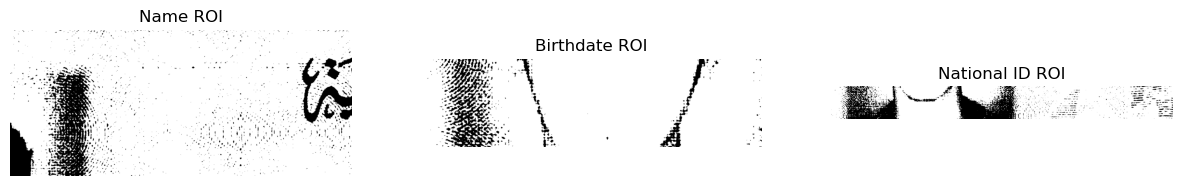

In [27]:
import cv2
import pytesseract
import numpy as np
import re
import matplotlib.pyplot as plt

# Load image
image = cv2.imread("id_card.jpeg")
h, w = image.shape[:2]

# ---------- Preprocessing ----------
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Resize (helps OCR on small fonts)
gray = cv2.resize(gray, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC)

# Sharpen
kernel = np.array([[0,-1,0], [-1,5,-1], [0,-1,0]])
sharp = cv2.filter2D(gray, -1, kernel)

# Threshold (Otsu is usually better for IDs)
_, thresh = cv2.threshold(sharp, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# ---------- Define ROIs ----------
# 1) Name area (upper right)
roi_name = thresh[0:int(h*0.4), int(w*0.4):w]

# 2) Birthdate area (bottom-left box)
roi_birth = thresh[int(h*0.65):int(h*0.85), 0:int(w*0.5)]

# 3) National ID area (bottom strip)
roi_id = thresh[int(h*0.85):h, 0:w]

# ---------- OCR Configs ----------
config_text = r'--oem 3 --psm 6 -l ara+eng'
config_digits = r'--oem 3 --psm 7 -c tessedit_char_whitelist=0123456789'

# OCR each region
name_text = pytesseract.image_to_string(roi_name, config=config_text)
birth_text = pytesseract.image_to_string(roi_birth, config=config_text)
id_text = pytesseract.image_to_string(roi_id, config=config_digits)

# ---------- Cleanup ----------
# Extract 14-digit ID
id_number = re.findall(r"\b\d{14}\b", id_text)

# Extract date yyyy/mm/dd or yyyy-mm-dd
birth_date = re.findall(r"\d{4}[/-]\d{1,2}[/-]\d{1,2}", birth_text)

# ---------- Results ----------
print("🔹 Extracted Fields:")
print("Name (raw):", name_text.strip())
print("Birthdate (raw):", birth_text.strip())
print("ID Number (raw):", id_text.strip())

if id_number:
    print("✅ National ID:", id_number[0])
if birth_date:
    print("✅ Birthdate:", birth_date[0])

# ---------- Debug: Show ROIs ----------
fig, axes = plt.subplots(1, 3, figsize=(15,5))
axes[0].imshow(roi_name, cmap="gray"); axes[0].set_title("Name ROI"); axes[0].axis("off")
axes[1].imshow(roi_birth, cmap="gray"); axes[1].set_title("Birthdate ROI"); axes[1].axis("off")
axes[2].imshow(roi_id, cmap="gray"); axes[2].set_title("National ID ROI"); axes[2].axis("off")
plt.show()



🔹 Extracted Fields:
Name (raw): ب ل مرا : خا ا :
ب ب ً" . "0 ‎٠‏ ا ب . ب نس
الا ااا الاي " اتير تاه ا الاب ِ 1
حا لا ا - : : ٍ " 0 د م" 2
انك نب كا ا ل ا ا
يال اا ‎١‏ اخ[ لاقت : م مكل اليم 20 لان ‎٠‏
‏لمدسنكطال ال ااا 3 0 ا 0 ا الا مقا 1
‎١‏ الي عي ابر ًّ“#" ا 1 انل أل ي 2 ا
1 الأ اا قح آنا نال طول و ‎١‏ 11 0 اال اط ا 0 ب
7 3 . ا را بأ الا عد ...ا .2
ىه ليا - 2 د لدم ل لها
Birthdate (raw OCR): 
National ID (raw OCR): 


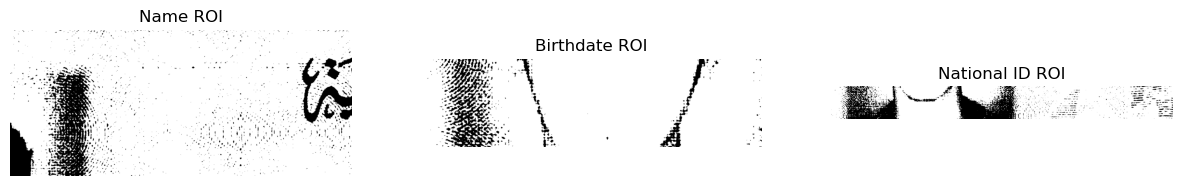

In [28]:
import cv2
import pytesseract
import numpy as np
import re
import matplotlib.pyplot as plt

# ---------- Load & Preprocess ----------
image = cv2.imread("id_card.jpeg")
h, w = image.shape[:2]

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray = cv2.resize(gray, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC)

# Sharpen
kernel = np.array([[0,-1,0], [-1,5,-1], [0,-1,0]])
sharp = cv2.filter2D(gray, -1, kernel)

# Otsu threshold
_, thresh = cv2.threshold(sharp, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# ---------- Define ROIs ----------
roi_name   = thresh[0:int(h*0.4), int(w*0.4):w]       # Name area (top-right)
roi_birth  = thresh[int(h*0.65):int(h*0.85), 0:int(w*0.5)] # Birthdate area
roi_id     = thresh[int(h*0.85):h, 0:w]               # National ID area

# ---------- OCR ----------
config_text   = r'--oem 3 --psm 6 -l ara'
config_digits = r'--oem 3 --psm 7 -c tessedit_char_whitelist=0123456789'

# OCR name (Arabic only)
name_text = pytesseract.image_to_string(roi_name, config=config_text).strip()

# OCR birthdate (digits only)
birth_text = pytesseract.image_to_string(roi_birth, config=config_digits)
birth_date = re.findall(r"\d{4}[/-]\d{2}[/-]\d{2}", birth_text)

# OCR National ID (digits only)
id_text = pytesseract.image_to_string(roi_id, config=config_digits)
id_number = re.findall(r"\d{14}", id_text)

# ---------- Parse National ID ----------
def parse_egyptian_id(nid):
    if len(nid) != 14:
        return None

    # Extract fields
    century_digit = int(nid[0])
    year = int(nid[1:3])
    month = int(nid[3:5])
    day = int(nid[5:7])
    governorate_code = nid[7:9]
    serial = nid[9:13]
    gender_digit = int(nid[12])  # 13th digit (index 12)

    # Century
    century = 1900 if century_digit == 2 else 2000
    full_year = century + year

    # Gender
    gender = "Male" if gender_digit % 2 != 0 else "Female"

    # Governorates mapping
    governorates = {
        "01": "Cairo", "02": "Alexandria", "03": "Port Said", "04": "Suez",
        "11": "Damietta", "12": "Dakahlia", "13": "Sharkia", "14": "Kalyoubia",
        "15": "Kafr El-Sheikh", "16": "Gharbia", "17": "Monufia", "18": "Beheira",
        "19": "Ismailia", "21": "Giza", "22": "Beni Suef", "23": "Fayoum",
        "24": "Minya", "25": "Assiut", "26": "Sohag", "27": "Qena",
        "28": "Aswan", "29": "Luxor", "31": "Red Sea", "32": "New Valley",
        "33": "Matrouh", "34": "North Sinai", "35": "South Sinai",
        "88": "Foreign"
    }
    governorate = governorates.get(governorate_code, "Unknown")

    return {
        "Birthdate": f"{full_year:04d}-{month:02d}-{day:02d}",
        "Governorate": governorate,
        "Gender": gender
    }

parsed_id = parse_egyptian_id(id_number[0]) if id_number else None

# ---------- Results ----------
print("\n🔹 Extracted Fields:")
print("Name (raw):", name_text)
print("Birthdate (raw OCR):", birth_text.strip())
print("National ID (raw OCR):", id_text.strip())

if id_number:
    print("✅ National ID:", id_number[0])
if birth_date:
    print("✅ Birthdate:", birth_date[0])
if parsed_id:
    print("✅ Parsed from National ID:", parsed_id)

# ---------- Debug: Show ROIs ----------
fig, axes = plt.subplots(1, 3, figsize=(15,5))
axes[0].imshow(roi_name, cmap="gray"); axes[0].set_title("Name ROI"); axes[0].axis("off")
axes[1].imshow(roi_birth, cmap="gray"); axes[1].set_title("Birthdate ROI"); axes[1].axis("off")
axes[2].imshow(roi_id, cmap="gray"); axes[2].set_title("National ID ROI"); axes[2].axis("off")
plt.show()


Resized shape: (1264, 1965, 3)


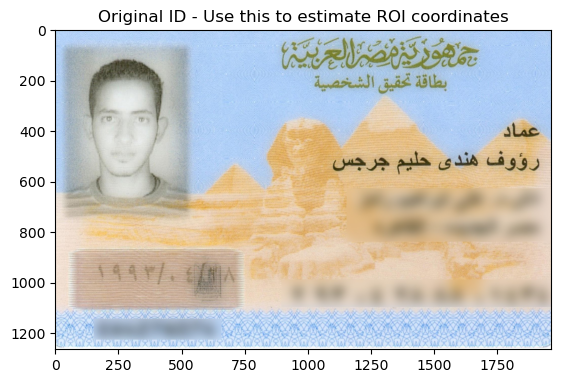

🔹 Extracted Fields:
Name: عماد
رؤٌوف هندى حليم جرجس
Birthdate: 
National ID: ا
حب : ٍ


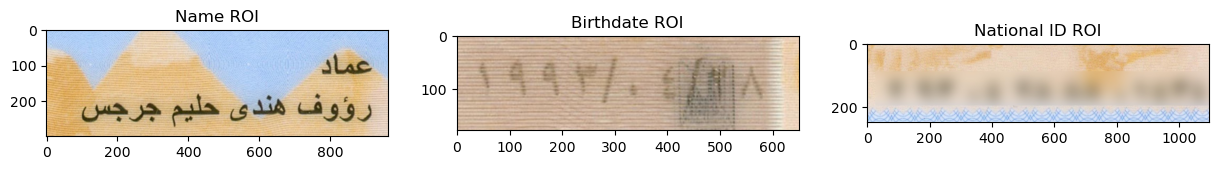

In [ ]:
import cv2
import pytesseract
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread("id_card_2.jpeg")

# Resize to fixed size
# fixed_width, fixed_height = 2000, 3000
# image = cv2.resize(image, (fixed_width, fixed_height))

print("Resized shape:", image.shape)  # should always be (600, 1000, 3)

# Show image to pick coordinates
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Original ID - Use this to estimate ROI coordinates")
plt.show()




# ----- MANUAL COORDINATES -----
# Adjust these values after inspecting the image
# format: image[y1:y2, x1:x2]
name_roi = image[300:600, 1000:2000]       # Example, adjust manually
birthdate_roi = image[880:1060, 130:780]  # Example, adjust manually
nid_roi = image[900:1150, 870:3000]        # Example, adjust manually

# OCR config
custom_config = r'--oem 3 --psm 6 -l ara'

# Extract text
name_text = pytesseract.image_to_string(name_roi, config=custom_config)
birthdate_text = pytesseract.image_to_string(birthdate_roi, config=custom_config)
nid_text = pytesseract.image_to_string(nid_roi, config=custom_config)

print("🔹 Extracted Fields:")
print("Name:", name_text.strip())
print("Birthdate:", birthdate_text.strip())
print("National ID:", nid_text.strip())

# Show ROIs for debugging
fig, axs = plt.subplots(1, 3, figsize=(15,5))
axs[0].imshow(cv2.cvtColor(name_roi, cv2.COLOR_BGR2RGB)); axs[0].set_title("Name ROI")
axs[1].imshow(cv2.cvtColor(birthdate_roi, cv2.COLOR_BGR2RGB)); axs[1].set_title("Birthdate ROI")
axs[2].imshow(cv2.cvtColor(nid_roi, cv2.COLOR_BGR2RGB)); axs[2].set_title("National ID ROI")
plt.show()


Resized shape: (479, 759, 3)


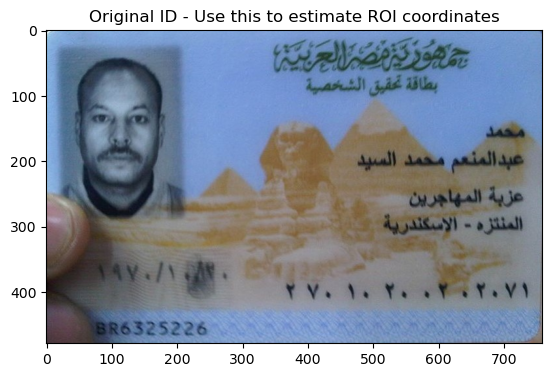

🔹 Extracted Fields:
Name: محمد
عبدالمنعم محمد السيد
Birthdate: ٤٠٣١٠٤٠٠
National ID: ١ ٣٣٣ ١٣٠٣٠٠


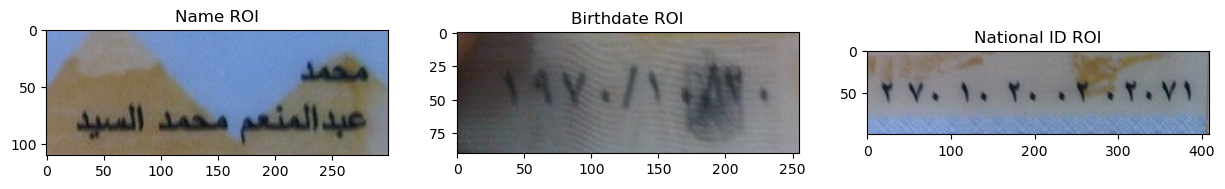

In [ ]:
import cv2
import pytesseract
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread("id_card.jpeg")

# Resize to fixed size
# fixed_width, fixed_height = 2000, 3000
# image = cv2.resize(image, (fixed_width, fixed_height))

print("Resized shape:", image.shape)  # should always be (600, 1000, 3)

# Show image to pick coordinates
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Original ID - Use this to estimate ROI coordinates")
plt.show()


# ----- MANUAL COORDINATES -----
# Adjust these values after inspecting the image
# format: image[y1:y2, x1:x2]
name_roi = image[120:230, 450:750]       # Example, adjust manually
birthdate_roi = image[330:420, 45:300]   # Example, adjust manually
nid_roi = image[350:450, 350:800]         # Example, adjust manually

# OCR config
# custom_config = r'--oem 3 --psm 6 -l ara'
custom_config = r'--oem 3 --psm 6 -l ara+eng'


# OCR configs for digits
configs_digits = [
    r'--oem 3 --psm 6 -l ara_number_id',
     r'--oem 3 --psm 6 -l eng -c tessedit_char_whitelist=0123456789',
     r'--oem 3 --psm 7 -l eng -c tessedit_char_whitelist=0123456789',
     r'--oem 3 --psm 8 -l eng -c tessedit_char_whitelist=0123456789',
     r'--oem 3 --psm 13 -l eng -c tessedit_char_whitelist=0123456789',
     r'--oem 3 --psm 7 -l ara+eng -c tessedit_char_whitelist=0123456789٠١٢٣٤٥٦٧٨٩'
     r'--oem 3 --psm 6 -l ara+eng -c tessedit_char_whitelist=0123456789٠١٢٣٤٥٦٧٨٩'

]

config_digits = configs_digits[0]

# Extract text
name_text = pytesseract.image_to_string(name_roi, config=custom_config)


birthdate_text = pytesseract.image_to_string(birthdate_roi, config=config_digits)
nid_text = pytesseract.image_to_string(nid_roi, config=config_digits)

print("🔹 Extracted Fields:")
print("Name:", name_text.strip())
print("Birthdate:", birthdate_text.strip())
print("National ID:", nid_text.strip())

# Show ROIs for debugging
fig, axs = plt.subplots(1, 3, figsize=(15,5))
axs[0].imshow(cv2.cvtColor(name_roi, cv2.COLOR_BGR2RGB)); axs[0].set_title("Name ROI")
axs[1].imshow(cv2.cvtColor(birthdate_roi, cv2.COLOR_BGR2RGB)); axs[1].set_title("Birthdate ROI")
axs[2].imshow(cv2.cvtColor(nid_roi, cv2.COLOR_BGR2RGB)); axs[2].set_title("National ID ROI")
plt.show()


Resized shape: (479, 759, 3)


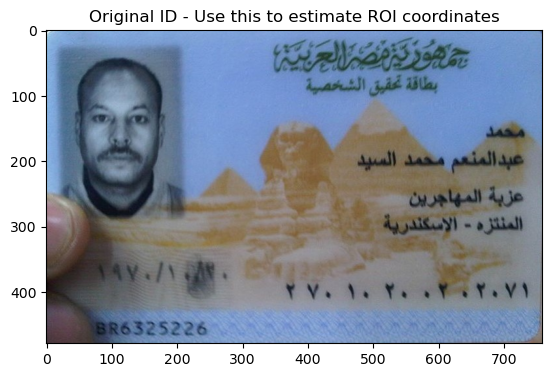

🔹 Extracted Fields:
Name: daa
Apoall dame patall ine
Birthdate: _ =
SS
BR6325226 ..
National ID: ١٣٧٠٩٠٢٠٠٠٢٠٠١٠٠٧١٠


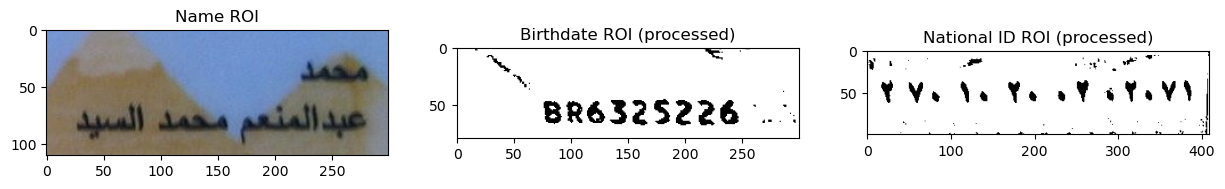

In [13]:
import cv2
import pytesseract
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread("id_card.jpeg")
print("Resized shape:", image.shape)

# Show image to pick coordinates
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Original ID - Use this to estimate ROI coordinates")
plt.show()

w,h,ch = image.shape
# ----- MANUAL COORDINATES -----
name_roi = image[120:230, 450:750]       # adjust
birthdate_roi = image[400:h, 0:300]   # adjust
nid_roi = image[350:450, 350:800]        # adjust

# OCR configs
config_name = r'--oem 3 --psm 6 -l eng'



# OCR configs for digits
configs_digits = [
     r'--oem 3 --psm 6 -l ara_number_id',
     r'--oem 3 --psm 6 -l eng -c tessedit_char_whitelist=0123456789',
     r'--oem 3 --psm 7 -l eng -c tessedit_char_whitelist=0123456789',
     r'--oem 3 --psm 8 -l eng -c tessedit_char_whitelist=0123456789',
     r'--oem 3 --psm 13 -l eng -c tessedit_char_whitelist=0123456789',
     r'--oem 3 --psm 7 -l ara+eng -c tessedit_char_whitelist=0123456789٠١٢٣٤٥٦٧٨٩'
]

config_digits = configs_digits[0]

# --- Preprocess function for digits ---
def preprocess_digits(roi):
    gray = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)
    # apply adaptive threshold to separate digits clearly
    thresh = cv2.adaptiveThreshold(
        gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 35, 15
    )
    # invert back to black text on white background
    processed = cv2.bitwise_not(thresh)
    return processed

# Extract text
name_text = pytesseract.image_to_string(name_roi, config=config_name)

birthdate_proc = preprocess_digits(birthdate_roi)
nid_proc = preprocess_digits(nid_roi)

birthdate_text = pytesseract.image_to_string(birthdate_proc, config=config_name)
nid_text = pytesseract.image_to_string(nid_proc, config=config_digits)

print("🔹 Extracted Fields:")
print("Name:", name_text.strip())
print("Birthdate:", birthdate_text.strip())
print("National ID:", nid_text.strip())

# Show ROIs for debugging
fig, axs = plt.subplots(1, 3, figsize=(15,5))
axs[0].imshow(cv2.cvtColor(name_roi, cv2.COLOR_BGR2RGB)); axs[0].set_title("Name ROI")
axs[1].imshow(birthdate_proc, cmap='gray'); axs[1].set_title("Birthdate ROI (processed)")
axs[2].imshow(nid_proc, cmap='gray'); axs[2].set_title("National ID ROI (processed)")
plt.show()


Oraginal: Image shape: (640, 640, 3)
After Resize: Image shape: (512, 712, 3)
🔹 Extracted Fields:
Name: 
Birthdate: 0 20
National ID: 


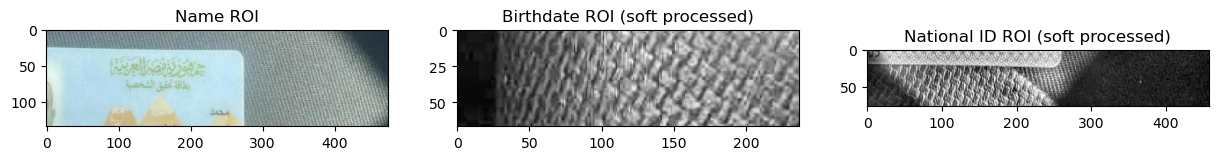

In [1]:
import cv2
import pytesseract
import matplotlib.pyplot as plt
import os

# Path to dataset
dataset_path = "dataset"

# Collect all images
image_files = []
for root, dirs, files in os.walk(dataset_path):
    for file in files:
        if file.lower().endswith((".jpg", ".jpeg", ".png")):
            image_files.append(os.path.join(root, file))
            
# Load the image
image = cv2.imread(image_files[0])
# image = cv2.imread("id_card_3.png")
print("Oraginal: Image shape:", image.shape)



def resize_ara_num(img):
    #scale_percent = 50  # percent of original size
    width = 712
    height = 512
    dim = (width, height)
    img = cv2.resize(img, dim, interpolation=cv2.INTER_AREA)
    return img

image = resize_ara_num(image)
print("After Resize: Image shape:", image.shape)

# ----- MANUAL COORDINATES -----
h, w, ch = image.shape
name_roi = image[int(h / 4.8):int(h/2.13), int(w / 3):int(w)]
birthdate_roi = image[int(h/1.15):int(h), int(w/15):int(w/2.5)]
nid_roi = image[int(h/1.3):int(h/1.09), int(w/2.8):int(w/1)]

# name_roi = image[120:230, 450:750]       # adjust
# birthdate_roi = image[430:520, 45:300]   # adjust
# nid_roi = image[350:450, 350:800]        # adjust




# OCR configs
config_name = r'--oem 3 --psm 6 -l ara+eng'


# OCR configs for digits
configs_digits = [
     r'--oem 3 --psm 6 -l ara_number_id',
     r'--oem 3 --psm 6 -l eng -c tessedit_char_whitelist=0123456789',
     r'--oem 3 --psm 7 -l eng -c tessedit_char_whitelist=0123456789',
     r'--oem 3 --psm 8 -l eng -c tessedit_char_whitelist=0123456789',
     r'--oem 3 --psm 13 -l eng -c tessedit_char_whitelist=0123456789',
     r'--oem 3 --psm 7 -l ara+eng -c tessedit_char_whitelist=0123456789٠١٢٣٤٥٦٧٨٩'
]

config_digits = configs_digits[0]

# --- Preprocess function for digits (soft enhancement, no binarization) ---
def preprocess_digits_soft(roi):
    gray = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)
    # Apply CLAHE for local contrast enhancement
    clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8,8))
    enhanced = clahe.apply(gray)
    return enhanced

# --- Normalize Arabic-Indic digits to English ---
def normalize_digits(text):
    mapping = str.maketrans("٠١٢٣٤٥٦٧٨٩", "0123456789")
    return text.translate(mapping)

# Extract text
name_preproccess =  preprocess_digits_soft(name_roi)
name_text = pytesseract.image_to_string(name_preproccess, config=config_name)

birthdate_proc = preprocess_digits_soft(birthdate_roi)
nid_proc = preprocess_digits_soft(nid_roi)

birthdate_text = pytesseract.image_to_string(birthdate_proc, config=config_name)
nid_text = pytesseract.image_to_string(nid_proc, config=config_digits)

# Normalize digits
birthdate_text = normalize_digits(birthdate_text.strip())
nid_text = normalize_digits(nid_text.strip())

print("🔹 Extracted Fields:")
print("Name:", name_text.strip())
print("Birthdate:", birthdate_text)
print("National ID:", nid_text)

# Show ROIs for debugging
fig, axs = plt.subplots(1, 3, figsize=(15,5))
axs[0].imshow(cv2.cvtColor(name_roi, cv2.COLOR_BGR2RGB)); axs[0].set_title("Name ROI")
axs[1].imshow(birthdate_proc, cmap='gray'); axs[1].set_title("Birthdate ROI (soft processed)")
axs[2].imshow(nid_proc, cmap='gray'); axs[2].set_title("National ID ROI (soft processed)")
plt.show()


MRZ Text:
BKS25226



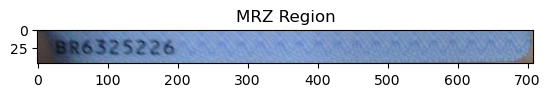

In [23]:
import cv2
import pytesseract
from matplotlib import pyplot as plt

# لو عندك ويندوز لازم تحدد مسار tesseract.exe
# pytesseract.pytesseract.tesseract_cmd = r"C:\Program Files\Tesseract-OCR\tesseract.exe"

# 1- اقرأ صورة البطاقة
image = cv2.imread("id_card.jpeg")

# 2- قص الجزء اللي فيه MRZ (أسفل البطاقة)
h, w, _ = image.shape
# نفترض إن الـ MRZ آخر 20% من البطاقة
mrz_region = image[int(h*0.90):h, 50:w]

# 3- تحويل للصورة الرمادية + Threshold لتحسين القراءة
gray = cv2.cvtColor(mrz_region, cv2.COLOR_BGR2GRAY)
_, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# 4- تشغيل OCR
custom_config = r'--oem 3 --psm 6 -c tessedit_char_whitelist=ABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789<'
mrz_text = pytesseract.image_to_string(thresh, config=custom_config)

# 5- عرض النتيجة
print("MRZ Text:")
print(mrz_text)

# لو عايز تشوف المنطقة المقصوصة
plt.imshow(cv2.cvtColor(mrz_region, cv2.COLOR_BGR2RGB))
plt.title("MRZ Region")
plt.show()


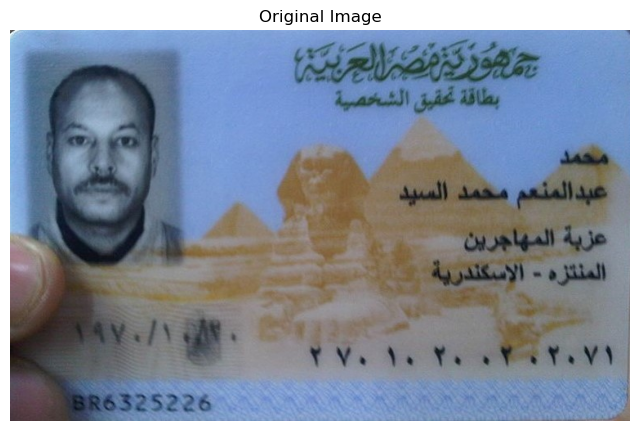

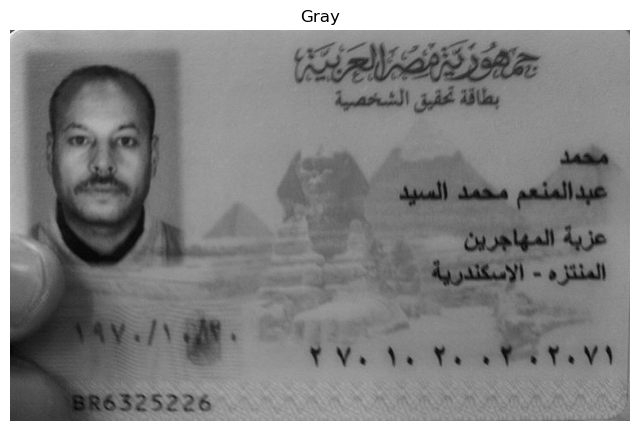

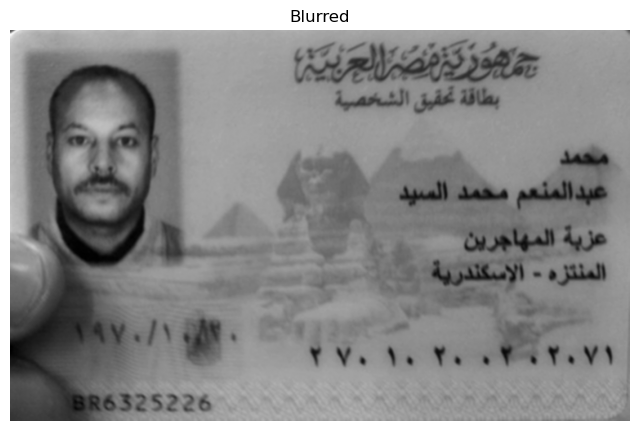

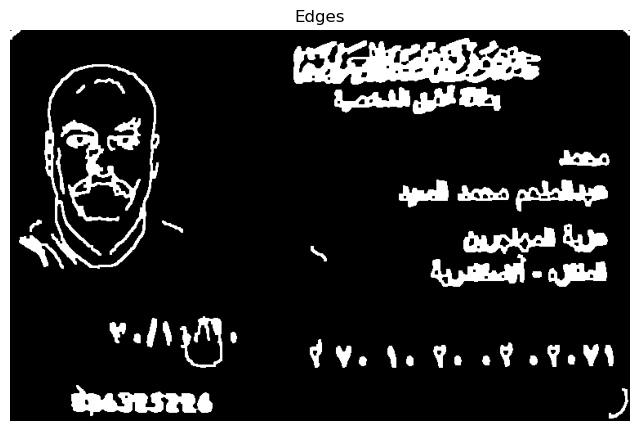

⚠️ Auto contour failed → using manual corners


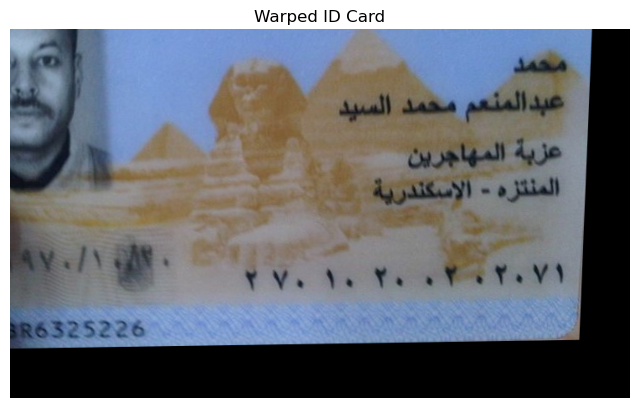

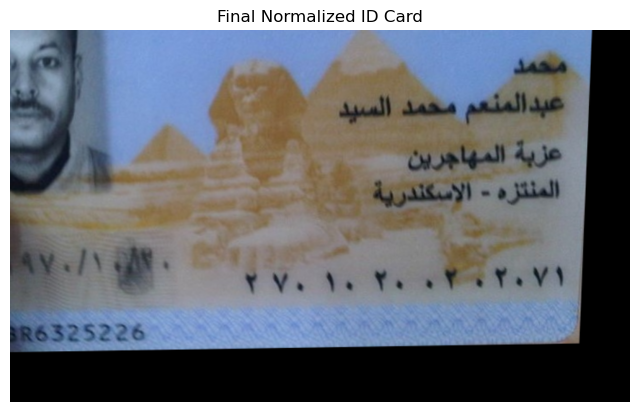

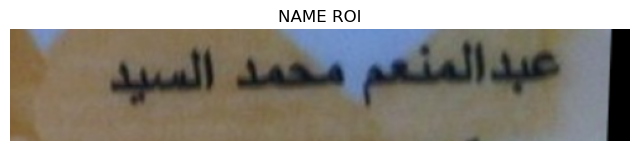

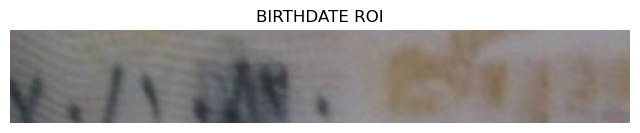

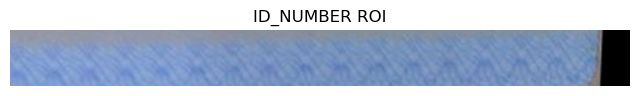

🔹 Extracted Fields:
Name: 
Birthdate: ٤٠٤١٥٠
National ID: 


In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# ---------------- UTILS ----------------
def show_step(img, title):
    """Show each step in RGB using matplotlib"""
    plt.figure(figsize=(8,6))
    if len(img.shape) == 2:
        plt.imshow(img, cmap="gray")
    else:
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.axis("off")
    plt.show()

def order_points(pts):
    """Order corner points: TL, TR, BR, BL"""
    rect = np.zeros((4,2), dtype="float32")
    s = pts.sum(axis=1)
    rect[0] = pts[np.argmin(s)]  # Top-left
    rect[2] = pts[np.argmax(s)]  # Bottom-right

    diff = np.diff(pts, axis=1)
    rect[1] = pts[np.argmin(diff)]  # Top-right
    rect[3] = pts[np.argmax(diff)]  # Bottom-left
    return rect

def four_point_transform(image, pts):
    """Warp perspective using 4 corner points"""
    rect = order_points(pts)
    (tl, tr, br, bl) = rect

    # Compute width
    widthA = np.linalg.norm(br - bl)
    widthB = np.linalg.norm(tr - tl)
    maxWidth = max(int(widthA), int(widthB))

    # Compute height
    heightA = np.linalg.norm(tr - br)
    heightB = np.linalg.norm(tl - bl)
    maxHeight = max(int(heightA), int(heightB))

    # Destination points
    dst = np.array([
        [0, 0],
        [maxWidth - 1, 0],
        [maxWidth - 1, maxHeight - 1],
        [0, maxHeight - 1]
    ], dtype="float32")

    # Perspective transform
    M = cv2.getPerspectiveTransform(rect, dst)
    warped = cv2.warpPerspective(image, M, (maxWidth, maxHeight))

    return warped

# ---------------- MAIN PIPELINE ----------------
def extract_id_card(path):
    # Step 1: Read image
    orig = cv2.imread(path)
    show_step(orig, "Original Image")

    # Step 2: Preprocess
    gray = cv2.cvtColor(orig, cv2.COLOR_BGR2GRAY)
    show_step(gray, "Gray")

    blurred = cv2.GaussianBlur(gray, (5,5), 0)
    show_step(blurred, "Blurred")

    edged = cv2.Canny(blurred, 30, 100)
    edged = cv2.dilate(edged, None, iterations=2)
    edged = cv2.erode(edged, None, iterations=1)
    show_step(edged, "Edges")

    # Step 3: Find contours
    contours, _ = cv2.findContours(edged.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
    contours = sorted(contours, key=cv2.contourArea, reverse=True)[:5]

    screenCnt = None
    for c in contours:
        peri = cv2.arcLength(c, True)
        approx = cv2.approxPolyDP(c, 0.02 * peri, True)
        if len(approx) == 4:  # found rectangle
            screenCnt = approx
            break

    # Step 4: Check if found
    if screenCnt is None:
        print("⚠️ Auto contour failed → using manual corners")
        # You must update these coordinates manually after looking at your image
        pts = np.array([
            [100, 100],   # top-left
            [800, 120],   # top-right
            [820, 550],   # bottom-right
            [80, 540]     # bottom-left
        ], dtype="float32")
    else:
        pts = screenCnt.reshape(4,2)

    # Step 5: Warp perspective
    warped = four_point_transform(orig, pts)
    show_step(warped, "Warped ID Card")

    # Step 6: Resize to fixed size for consistency
    fixed = cv2.resize(warped, (1000, 600))
    show_step(fixed, "Final Normalized ID Card")

    return fixed


    # --- Step 7: Crop regions (replace your old manual crops with this function) ---
def crop_fields(id_card):
    h, w, _ = id_card.shape

    # Relative percentages (adjust once → works for all IDs after normalization)
    rois = {
        "name":      id_card[int(h*0.15):int(h*0.30), int(w*0.45):int(w*0.95)],
        "birthdate": id_card[int(h*0.55):int(h*0.65), int(w*0.05):int(w*0.45)],
        "id_number": id_card[int(h*0.72):int(h*0.82), int(w*0.30):int(w*0.95)],
    }

    # Show cropped regions
    for key, roi in rois.items():
        show_step(roi, f"{key.upper()} ROI")

    return rois


# ---------------- USAGE ----------------
# --- Usage ---
id_card = extract_id_card("id_card.jpeg")
rois = crop_fields(id_card)

# --- Step 8: OCR ---
custom_config_text   = r'--oem 3 --psm 6 -l ara'
custom_config_digits = r'--oem 3 --psm 6 -l ara_number_id'

name_text      = pytesseract.image_to_string(rois["name"], config=custom_config_text)
birthdate_text = pytesseract.image_to_string(rois["birthdate"], config=custom_config_digits)
nid_text       = pytesseract.image_to_string(rois["id_number"], config=custom_config_digits)

print("🔹 Extracted Fields:")
print("Name:", name_text.strip())
print("Birthdate:", birthdate_text.strip())
print("National ID:", nid_text.strip())

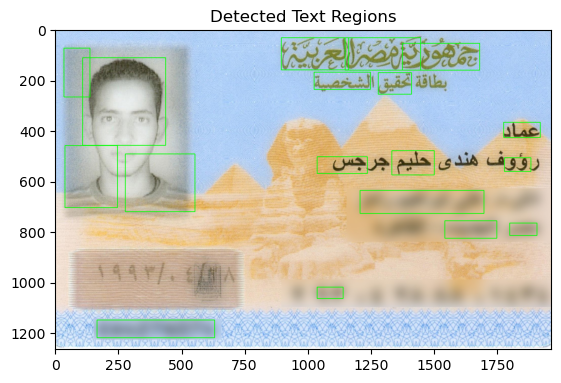

🔹 Extracted Text Regions:
[1149,34,299,128]: م ا
لر** راغص نا
[896,34,267,127]: ص بع الي
[1376,56,306,106]: قودب
2
[35,75,103,193]: ل
ا
[109,113,329,346]: 6,0
[1026,170,223,68]: | م
[1280,172,132,85]: لب الوا
نا
[1777,368,145,60]: عماد
[39,460,208,245]: ا
[1334,480,168,96]: حليم
[278,493,276,228]: :
[1038,504,199,66]: جس
[1780,508,105,54]: وق
[1208,637,491,91]: ل آل سا ل
[1544,757,206,69]: ل
[1801,766,108,49]: ل
[1038,1019,103,45]: *.« ©
[166,1149,466,70]: -- 4» ”»«


In [29]:
##Automatic or Dymnic Detection

import cv2
import pytesseract
import matplotlib.pyplot as plt

# Load image
image = cv2.imread("id_card_2.jpeg")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Threshold to highlight text
_, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

# Find contours
contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Sort contours top-to-bottom (by y coordinate)
contours = sorted(contours, key=lambda c: cv2.boundingRect(c)[1])

# OCR config
custom_config = r'--oem 3 --psm 6 -l ara'

detected_texts = []
for cnt in contours:
    x, y, w, h = cv2.boundingRect(cnt)
    if w > 100 and h > 20:  # filter out small noise
        roi = image[y:y+h, x:x+w]
        text = pytesseract.image_to_string(roi, config=custom_config).strip()
        if text:
            detected_texts.append((x,y,w,h,text))
            cv2.rectangle(image, (x,y), (x+w, y+h), (0,255,0), 2)

# Show detected ROIs
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Detected Text Regions")
plt.show()

# Print extracted results
print("🔹 Extracted Text Regions:")
for (x,y,w,h,text) in detected_texts:
    print(f"[{x},{y},{w},{h}]: {text}")


# Github Code 

In [2]:
from matplotlib import pyplot

from pytesseract import *
from tkinter import *
from PIL import ImageTk,Image
import cv2
import numpy as np
import argparse
import imutils
import os

def main():
    # pytesseract.tesseract_cmd = r'C:\Users\3shry\AppData\Local\Programs\Tesseract-OCR\tesseract.exe'
    # img = capture_image()

    # # Path to dataset
    # dataset_path = "dataset"

    # # Collect all images
    # image_files = []
    # for root, dirs, files in os.walk(dataset_path):
    #     for file in files:
    #         if file.lower().endswith((".jpg", ".jpeg", ".png")):
    #             image_files.append(os.path.join(root, file))
            
    # # Load the image
    # img = cv2.imread(image_files[1])
    # # image = cv2.imread("id_card_3.png")
    # print("Oraginal: Image shape:", img.shape)
    

    img = cv2.imread("id_card.jpeg")

    #img=cv2.imread("data_set/1.jpg")

    eng_num_res=extract_eng_num(img)
    print(eng_num_res)

    #save_images()
    ara_num_res=extract_ara_num(img)
    print(ara_num_res)

    ara_words_res=extract_ara_words(img)
    print(ara_words_res)


def extract_ara_words(img):

    img = resize_ara_num(img)
    h, w, ch = img.shape
    img = img[int(h / 4.2):int(h/2.2), int(w / 3):int(w)]
    #img = increase_contrast(img)
    cv2.imshow('image0', img)
    cv2.waitKey(0)

    #img=remove_shadow(img)

    # gray scale
    img = gray(img)
    img = threshold_word(img)

    cv2.imshow("img", img)
    cv2.waitKey(0)

    res = pytesseract.image_to_string(img, lang="ara")
    print(res)


def extract_eng_num(img):

    #focus on the number section
    img = resize_eng_num(img)
    h,w,ch=img.shape
    img = img[int(h/1.3):int(h), int(0):int(w/2.5)]
    copy=img

    # Just after you crop
    cv2.imshow("MRZ Crop", img)
    cv2.waitKey(0)

    # # Test raw OCR
    # raw_text = pytesseract.image_to_string(img, lang="eng")
    # print("RAW OCR:", raw_text)


    ############################
    count=0
    #in the loop untill reading the number
    while(True):
        count=count+1
        #cv2.imshow('image0', img)
        #cv2.waitKey(0)

        img = gray(img)
        img = threshold_eng_num(img)
        #img= remove_noise(img)
        #cv2.imshow("img", img)
        #cv2.waitKey(0)

        # res = detect_digit_only(img).split()
        res = pytesseract.image_to_string(img, lang="eng").split()
        print(f"res: {res}")
        if res != []:
            for i in res:
                if len(i)>6:                   
                    return (i[len(i) - 7:])


        res = pytesseract.image_to_string(img, lang="eng").split()
        c_res=[]
        if res != []:
            for i in res:
                if len(i) > 6:
                    c_res = i
                    break

        if (len(c_res) > 6):
            ch=0
            for i in c_res:
                if i.isalpha():
                    ch=ch+1
                    break
                else:
                    continue
            if ch>0:
                ""
            else:
                return (c_res[len(c_res) - 7:])


        img = increase_contrast(copy)
        if count>1:
            img = increase_contrast(img)
        if count==3:
            return "please re-capture the image"
        continue
    #################################



def extract_ara_num(img):
    #num=3

    # focus on the number section
    #img = cv2.imread("test/7.jpg")

    img = resize_ara_num(img)
    h,w,ch=img.shape
    img = img[int(h/1.8):int(h/1.08), int(w/2.8):int(w/1)]
    copy=img
    ##############################
    # cv2.imshow("MRZ Crop", img)
    # cv2.waitKey(0)


    count = 0
    # in the loop untill reading the number
    while (True):
        count = count + 1
        #cv2.imshow('image0', img)
        #cv2.waitKey(0)

        img = gray(img)
        #img = gaussian_blur(img)
        #img=remove_noise(img)
        #img=canny(img)
        img = threshold_eng_num(img)

        # img= remove_noise(img)

        #cv2.imwrite("test_croped/"+str(7)+".jpg", img)

        #cv2.imshow("img", img)
        #cv2.waitKey(0)

        res = pytesseract.image_to_string(img, lang="ara_number_id").split()
        print(res)
        if res != []:
            for i in res:
                print(i)
                if len(i) > 13 and len(i) < 15:
                    return i

        f_res=""
        for i in range(1,len(res)+1):
            if i >1:
                temp=res[len(res) - i]
                temp+=f_res
                f_res = temp
            else:
                f_res+= res[len(res) - i]

            if len(f_res)==14:
                return f_res


        img = increase_contrast(copy)
        if count > 1:
            img = increase_contrast(img)
        if count == 3:
            return "please re-capture the image"
        continue
    ################################################


def save_images():
    for i in range(1, 53):
        img = cv2.imread("data_set/" + str(i) + ".jpg")
        img = resize_ara_num(img)
        h, w, ch = img.shape
        img = img[int(h / 1.8):int(h / 1.08), int(w / 3):int(w / 1)]
        cv2.imwrite("training_data_set_color_version/" + str(i) + ".jpg", img)

##//////////////////////internet scource code //////////////////////////////////

def remove_noise(image):
    return cv2.medianBlur(image, 5)


# thresholding
def thresholding(image):
    return cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]


# dilation
def dilate(image):
    kernel = np.ones((5, 5), np.uint8)
    return cv2.dilate(image, kernel, iterations=1)


# erosion
def erode(image):
    kernel = np.ones((5, 5), np.uint8)
    return cv2.erode(image, kernel, iterations=1)


# opening - erosion followed by dilation
def opening(image):
    kernel = np.ones((5, 5), np.uint8)
    return cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)


# canny edge detection
def canny(image):
    return cv2.Canny(image, 100, 200)


# skew correction
def deskew(image):
    coords = np.column_stack(np.where(image > 0))
    angle = cv2.minAreaRect(coords)[-1]
    if angle < -45:
        angle = -(90 + angle)

    else:
        angle = -angle

    (h, w) = image.shape[:2]
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated = cv2.warpAffine(image, M, (w, h), flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)
    return rotated


def splitting_the_image(img):
    h, w, c = img.shape
    boxes = pytesseract.image_to_boxes(img)
    for b in boxes.splitlines():
        b = b.split(' ')
        img = cv2.rectangle(img, (int(b[1]), h - int(b[2])), (int(b[3]), h - int(b[4])), (0, 255, 0), 2)

    cv2.imshow('img', img)
    cv2.waitKey(0)

    #img = cv2.imread('invoice-sample.jpg')

    d = pytesseract.image_to_data(img, output_type=Output.DICT)
    print(d.keys())

    n_boxes = len(d['text'])
    for i in range(n_boxes):
        if int(d['conf'][i]) > 60:
            (x, y, w, h) = (d['left'][i], d['top'][i], d['width'][i], d['height'][i])
            img = cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)

    cv2.imshow('img', img)
    cv2.waitKey(0)


def detect_oriantation(img):

    osd = pytesseract.image_to_osd(img)
    angle = re.search('(?<=Rotate: )\d+', osd).group(0)
    script = re.search('(?<=Script: )\d+', osd).group(0)
    print("angle: ", angle)
    print("script: ", script)

def detect_digit_only(img):
    # custom_config = r'--oem 3 --psm 6 outputbase digits'
    # Instead of only digits, allow MRZ chars (A–Z and numbers)
    custom_config = r'-c tessedit_char_whitelist=ABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789 --psm 6'
    res=pytesseract.image_to_string(img, config=custom_config)
    return res

def detect_custome(img):
    custom_config = r'-c tessedit_char_whitelist=0123456789 --psm 6'
    print(pytesseract.image_to_string(img, config=custom_config))
##////////////////////////////////////////////////////////##



def increase_contrast(img):
    # -----Converting image to LAB Color model-----------------------------------
    lab = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
    #cv2.imshow("lab", lab)

    # -----Splitting the LAB image to different channels-------------------------
    l, a, b = cv2.split(lab)
    #cv2.imshow('l_channel', l)
    #cv2.imshow('a_channel', a)
    #cv2.imshow('b_channel', b)

    # -----Applying CLAHE to L-channel-------------------------------------------
    clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8, 8))
    cl = clahe.apply(l)
    #cv2.imshow('CLAHE output', cl)

    # -----Merge the CLAHE enhanced L-channel with the a and b channel-----------
    limg = cv2.merge((cl, a, b))
    #cv2.imshow('limg', limg)

    # -----Converting image from LAB Color model to RGB model--------------------
    final = cv2.cvtColor(limg, cv2.COLOR_LAB2BGR)
    #cv2.imshow('final', final)
    return final


def extract_objects(img):
    image = img
    original = image.copy()
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    blurred = cv2.GaussianBlur(gray, (3, 3), 0)
    canny = cv2.Canny(blurred, 120, 255, 1)
    kernel = np.ones((5, 5), np.uint8)
    dilate = cv2.dilate(canny, kernel, iterations=1)

    # Find contours
    cnts = cv2.findContours(dilate, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cnts = cnts[0] if len(cnts) == 2 else cnts[1]

    # Iterate thorugh contours and filter for ROI
    image_number = 0
    for c in cnts:
        x, y, w, h = cv2.boundingRect(c)
        cv2.rectangle(image, (x, y), (x + w, y + h), (36, 255, 12), 2)
        ROI = original[y:y + h, x:x + w]
        cv2.imwrite("ROI/ROI_{}.jpg".format(image_number), ROI)
        image_number += 1

    cv2.imshow('canny', canny)
    cv2.imshow('image', image)
    cv2.waitKey(0)

def remove_shadow(img):
    rgb_planes = cv2.split(img)

    result_planes = []
    result_norm_planes = []
    for plane in rgb_planes:
        dilated_img = cv2.dilate(plane, np.ones((7, 7), np.uint8))
        bg_img = cv2.medianBlur(dilated_img, 21)
        diff_img = 255 - cv2.absdiff(plane, bg_img)
        norm_img = cv2.normalize(diff_img, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8UC1)
        result_planes.append(diff_img)
        result_norm_planes.append(norm_img)

    result = cv2.merge(result_planes)
    result_norm = cv2.merge(result_norm_planes)

    #cv2.imwrite('shadows_out.png', result)
    #cv2.imwrite('shadows_out_norm.png', result_norm)
    return result_norm


def capture_image():
    img = cv2.VideoCapture()
    # The device number might be 0 or 1 depending on the device and the webcam
    img.open(0, cv2.CAP_DSHOW)
    while (True):
        ret, frame = img.read()
        cv2.imshow('frame', frame)
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    img.release()
    cv2.destroyAllWindows()

    return frame


def sharpen(img):

    kernel = np.array([[0, -1, 0],
                       [-1, 5, -1],
                       [0, -1, 0]])
    image_sharp = cv2.filter2D(src=img, ddepth=-1, kernel=kernel)
    return image_sharp


def gaussian_blur(img):
    img = cv2.GaussianBlur(img, (3, 3), 1)
    return img

def decrease_brightness(img):
    img = np.int16(img)
    img=img-100
    img = np.clip(img, 0, 255)
    img = np.uint8(img)

    return img


def increase_brightness(img,value):
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    h, s, v = cv2.split(hsv)

    lim = 255 - value
    v[v > lim] = 255
    v[v <= lim] += value

    final_hsv = cv2.merge((h, s, v))
    img = cv2.cvtColor(final_hsv, cv2.COLOR_HSV2BGR)
    return img

def color_raise(img):
    boundaries = [
        ([0, 0, 0], [70, 70, 70])
    ]

    for (lower, upper) in boundaries:
        # create NumPy arrays from the boundaries
        lower = np.array(lower, dtype="uint8")
        upper = np.array(upper, dtype="uint8")
        # find the colors within the specified boundaries and apply
        # the mask
        mask = cv2.inRange(img, lower, upper)
        output = cv2.bitwise_and(img, img, mask=mask)
        # show the images
        cv2.imshow("images", np.hstack([img, output]))
        cv2.waitKey(0)
    return output

def erode(img):
    img = cv2.erode(img.copy(), None,iterations=2)
    return img

def dilate(img):
    img = cv2.dilate(img.copy(), None,iterations=2)
    return img

def gray(img):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    return gray

def threshold_eng_num(img):
    th, img = cv2.threshold(img, 100, 255, cv2.THRESH_TRUNC)#292 041802 00995 94 754 2758446 47
    return img

def threshold_ara_num(img):
    th, img = cv2.threshold(img, 100, 255, cv2.THRESH_TRUNC)#292 041802 00995 94 754 2758446 47
    return img

def threshold_word(img):
    th, img = cv2.threshold(img, 100, 255, cv2.THRESH_TRUNC)#292 041802 00995 94 754 2758446 47
    return img

def resize_eng_num(img):
    #scale_percent = 50  # percent of original size
    width = 712
    height = 512
    dim = (width, height)
    img = cv2.resize(img, dim, interpolation=cv2.INTER_AREA)
    return img

def resize_ara_num(img):
    #scale_percent = 50  # percent of original size
    width = 712
    height = 512
    dim = (width, height)
    img = cv2.resize(img, dim, interpolation=cv2.INTER_AREA)
    return img

def Canny(img):
    img = cv2.Canny(img, 120, 255)
    return img

def fill(img):
    im_floodfill = img.copy()

    h, w = img.shape[:2]
    mask = np.zeros((h + 2, w + 2), np.uint8)
    cv2.floodFill(im_floodfill, mask, (0, 0), 255)
    im_floodfill_inv  = cv2.bitwise_not(im_floodfill)
    im_out = img | im_floodfill_inv
    return im_out


if __name__ == '__main__':
    # form = Tk()
    # canvas = Canvas(form, width=1200, height=650)
    # canvas.pack()
    main()



res: []
res: []
res: []
please re-capture the image
['٠٠٠٣٠', '٢', '٩٤٨٠٤٠٠٠٤١٠٥٣٠٠٠٠', '٢٧٠', '١٠', '٢٠', '٠٢', '٠٢٠٧١']
٠٠٠٣٠
٢
٩٤٨٠٤٠٠٠٤١٠٥٣٠٠٠٠
٢٧٠
١٠
٢٠
٠٢
٠٢٠٧١
٢٧٠١٠٢٠٠٢٠٢٠٧١
عبدالمنعم محمد السيد

None


⚠️ No ID card detected


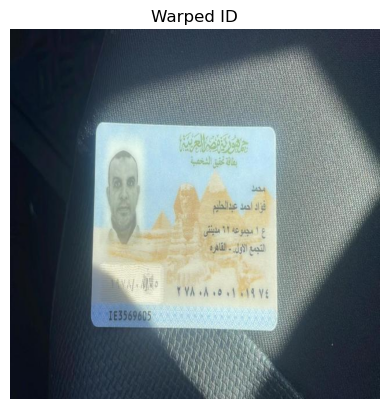

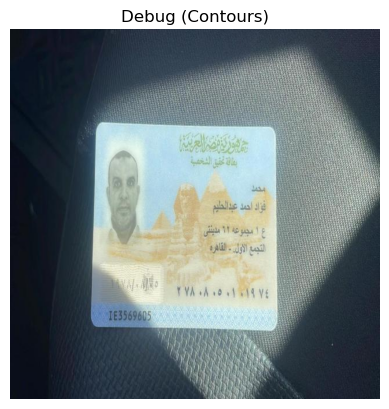

In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


def detect_and_warp_id(image_path):
    img = cv2.imread(image_path)
    orig = img.copy()
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    gray = cv2.GaussianBlur(gray, (5,5), 0)

    # Adaptive threshold + edges
    thresh = cv2.adaptiveThreshold(gray, 255, 
                                   cv2.ADAPTIVE_THRESH_GAUSSIAN_C, 
                                   cv2.THRESH_BINARY, 11, 2)
    edges = cv2.Canny(thresh, 50, 200)

    # Find contours
    contours, _ = cv2.findContours(edges, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
    contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]

    screenCnt = None
    for c in contours:
        peri = cv2.arcLength(c, True)
        approx = cv2.approxPolyDP(c, 0.02 * peri, True)

        if len(approx) == 4:   # Found a rectangle
            screenCnt = approx
            break

    # If no 4-corner contour found, fallback
    if screenCnt is None:
        print("⚠️ No ID card detected")
        return orig, orig

    # Draw debug (detected edges on original image)
    debug = orig.copy()
    cv2.drawContours(debug, [screenCnt], -1, (0,255,0), 3)

    # Perspective transform (warp)
    pts = screenCnt.reshape(4,2).astype("float32")

    # Order points: TL, TR, BR, BL
    s = pts.sum(axis=1)
    rect = np.zeros((4,2), dtype="float32")
    rect[0] = pts[np.argmin(s)]
    rect[2] = pts[np.argmax(s)]
    diff = np.diff(pts, axis=1)
    rect[1] = pts[np.argmin(diff)]
    rect[3] = pts[np.argmax(diff)]

    (tl, tr, br, bl) = rect
    widthA = np.linalg.norm(br - bl)
    widthB = np.linalg.norm(tr - tl)
    maxWidth = max(int(widthA), int(widthB))

    heightA = np.linalg.norm(tr - br)
    heightB = np.linalg.norm(tl - bl)
    maxHeight = max(int(heightA), int(heightB))

    dst = np.array([
        [0,0],
        [maxWidth-1,0],
        [maxWidth-1,maxHeight-1],
        [0,maxHeight-1]], dtype="float32")

    M = cv2.getPerspectiveTransform(rect, dst)
    warp = cv2.warpPerspective(orig, M, (maxWidth, maxHeight))

    return warp, debug
warped, debug = detect_and_warp_id(image_files[0])

# Convert both to RGB for matplotlib
id_card_rgb_warped = cv2.cvtColor(warped, cv2.COLOR_BGR2RGB)
id_card_rgb_debug  = cv2.cvtColor(debug, cv2.COLOR_BGR2RGB)

# Show warped card
plt.imshow(id_card_rgb_warped)
plt.title("Warped ID")
plt.axis("off")
plt.show()

# Show debug with contours
plt.imshow(id_card_rgb_debug)
plt.title("Debug (Contours)")
plt.axis("off")
plt.show()




# Combine Front and Back

Name: أحمد
فتحى محمد احمد العدوى
Address Text: 7ش العروسى-ش بديع-طوسون
روض الفرج - القاهره
ID Number in Arabic: ٢٩٦٠٩١٥١٨٠٢٧٣١
ID Number in English: 29609151802731
MRZ: HW3117979
Birthdate: 15-09-1996
Gender: ذكر
Birth Governate : البحيرة


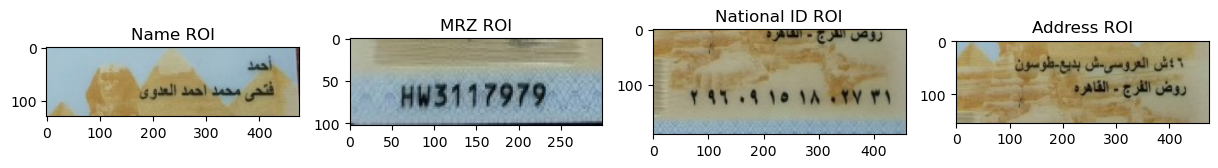

In [40]:
import cv2
import pytesseract
import numpy as np
import matplotlib.pyplot as plt


# ------------------- Preprocessing -------------------

def gray(img):
    if len(img.shape) == 3:  # color image
        return cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    return img  # already grayscale

def threshold(img):
    _, th = cv2.threshold(img, 100, 255, cv2.THRESH_TRUNC)
    return th

def increase_contrast(img):
    lab = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
    l, a, b = cv2.split(lab)
    clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8, 8))
    cl = clahe.apply(l)
    limg = cv2.merge((cl, a, b))
    return cv2.cvtColor(limg, cv2.COLOR_LAB2BGR)

def resize_id_card(img):
    #scale_percent = 50  # percent of original size
    width = 712
    height = 512
    dim = (width, height)
    img = cv2.resize(img, dim, interpolation=cv2.INTER_AREA)
    return img


def preprocess_arabic_text(img):
    g = gray(img)
    th = cv2.adaptiveThreshold(
        g, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, 
        cv2.THRESH_BINARY, 31, 15
    )
    return th
# ------------------- OCR Helper -------------------

def ocr_loop(img, lang="eng", min_len=6, max_iter=3):
    """Try multiple preprocessing passes until OCR succeeds"""
    copy = img.copy()
    for attempt in range(max_iter):
        g = gray(img)
        th = threshold(g)
        text = pytesseract.image_to_string(th, lang=lang).strip()
        if len(text) >= min_len:
            return text
        img = increase_contrast(copy)  # retry with stronger contrast
    return "OCR Failed"

### ------------------- Extractors -------------------

## ---------------Front Only---------------
def extract_name(img):
    h, w, _ = img.shape
    roi = img[int(h*0.2):int(h/2.2), int(w/3):w]   # adjust as needed

    # proc = preprocess_arabic_text(roi)
    text = pytesseract.image_to_string(roi, lang="ara").strip()

    return text, roi

def extract_address(img, max_iter=5):
    h, w, _ = img.shape
    roi = img[int(h*0.40):int(h*0.70), int(w/3):w]   # crop address region

    for attempt in range(max_iter):
        g = gray(roi)
        th = threshold(g)

        # First pass: Arabic text only
        text = pytesseract.image_to_string(th, lang="ara").strip()

        # Second pass: Arabic-Indic digits
        digits_text = pytesseract.image_to_string(th, lang="ara_number_id").strip()

        if text or digits_text:
            return text, digits_text, roi

        # retry with stronger contrast if nothing found
        roi = increase_contrast(roi)

    return "OCR Failed", "", roi

def extract_mrz(img):
    h, w, _ = img.shape
    roi = img[int(h*0.80):h, 0:300]  # MRZ area
    return ocr_loop(roi, lang="eng", min_len=6),roi



## ---------------Back Only---------------

def extract_job(img):
    h, w, _ = img.shape
    roi = img[int(h*0.2):int(h/2.2), int(w/3):w]   # adjust as needed

    # proc = preprocess_arabic_text(roi)
    text = pytesseract.image_to_string(roi, lang="ara").strip()

    return text, roi


def extract_gender(img):
    h, w, _ = img.shape
    roi = img[int(h/4):int(h/2.6), int(w/1.5):int(w/1.24)]   # adjust as needed

    proc = preprocess_arabic_text(roi)
    text = pytesseract.image_to_string(proc, lang="ara").strip()

    return text, proc


def extract_status(img):
    h, w, _ = img.shape
    roi = img[int(h*0.2):int(h/2.2), int(w/3):w]   # adjust as needed

    # proc = preprocess_arabic_text(roi)
    text = pytesseract.image_to_string(roi, lang="ara").strip()

    return text, roi

def extract_religion(img):
    h, w, _ = img.shape
    roi = img[int(h*0.2):int(h/2.2), int(w/3):w]   # adjust as needed

    # proc = preprocess_arabic_text(roi)
    text = pytesseract.image_to_string(roi, lang="ara").strip()

    return text, roi

def extract_husband_name(img):
    h, w, _ = img.shape
    roi = img[int(h*0.2):int(h/2.2), int(w/3):w]   # adjust as needed

    # proc = preprocess_arabic_text(roi)
    text = pytesseract.image_to_string(roi, lang="ara").strip()

    return text, roi



## ---------------Front and Back---------------
def extract_id_number(img, isFront,max_iter=5):
    h, w, ch = img.shape
    if(isFront):
        roi = img[int(h/1.8):int(h/1.08), int(w/2.8):int(w/1)]
    else:
        roi = img[int(0):int(h/6.5), int(w/2.3):int(w/1)]

    for attempt in range(max_iter):
        g = gray(roi)
        th = threshold(g)
        res = pytesseract.image_to_string(th, lang="ara_number_id").split()

        if res:
            for i in res:
                if 13 < len(i) < 15:  # 14 digits
                    return i, roi

            # try reconstructing digits
            f_res = ""
            for i in range(1, len(res) + 1):
                f_res = res[-i] + f_res
                if len(f_res) == 14:
                    return f_res, roi

        # retry with contrast enhancement
        # roi = increase_contrast(roi)

    return "OCR Failed", roi


# ------------------- Convert -------------------

def convert_ara_to_eng_digits(text):
    mapping = {
        '٠':'0','١':'1','٢':'2','٣':'3','٤':'4',
        '٥':'5','٦':'6','٧':'7','٨':'8','٩':'9'
    }
    return ''.join(mapping.get(ch, ch) for ch in text)

# ----------analyze id number----------
def analyze_id_number(nid: str):
    if len(nid) != 14 or not nid.isdigit():
        return "Id Number Is Wrong"

    
    century = 1900 if nid[0] == "2" else 2000

    # Birthdate
    year = century + int(nid[1:3])
    month = int(nid[3:5])
    day = int(nid[5:7])
    birthdate = f"{day:02d}-{month:02d}-{year}"

    # Governorate
    governorate_code = int(nid[7:9])
    governorates = {
        1: "القاهرة", 21: "الجيزة", 2: "الإسكندرية", 12: "الدقهلية",
        31: "البحر الأحمر", 18: "البحيرة", 23: "الفيوم", 16: "الغربية",
        19: "الإسماعيلية", 17: "المنوفية", 24: "المنيا", 14: "القليوبية",
        32: "الوادي الجديد", 4: "السويس", 28: "أسوان", 25: "أسيوط",
        22: "بني سويف", 3: "بورسعيد", 11: "دمياط", 13: "الشرقية",
        35: "جنوب سيناء", 15: "كفر الشيخ", 33: "مطروح", 29: "الأقصر",
        27: "قنا", 34: "شمال سيناء", 26: "سوهاج"
    }
    birth_governorate = governorates.get(governorate_code, "غير معروف")

    # Gender
    serial_number = int(nid[12])
    gender = "ذكر" if serial_number % 2 != 0 else "أنثى"

    return birthdate, birth_governorate, gender


# ------------------- Main -------------------

def front_id_card(img):

    name_text , name_roi = extract_name(img)
    ara_id_number_text , id_number_roi = extract_id_number(img,isFront=True)
    mrz_text , mrz_roi = extract_mrz(img)
    address_text,digits_text,address_roi = extract_address(img)
    eng_id_number_text=convert_ara_to_eng_digits(ara_id_number_text)
    birth_date_text,birth_governate_text, gender_text = analyze_id_number(eng_id_number_text)


    print("Name:", name_text)
    print("Address Text:", address_text)
    # print("Address Digits:", digits_text)
    print("ID Number in Arabic:",ara_id_number_text)
    print("ID Number in English:",eng_id_number_text)
    print("MRZ:", mrz_text)
    print("Birthdate:", birth_date_text)
    print("Gender:", gender_text)
    print("Birth Governate :", birth_governate_text)

    # Show ROIs for debugging
    fig, axs = plt.subplots(1, 4, figsize=(15,5))
    axs[0].imshow(cv2.cvtColor(name_roi, cv2.COLOR_BGR2RGB)); axs[0].set_title("Name ROI")
    axs[1].imshow(cv2.cvtColor(mrz_roi, cv2.COLOR_BGR2RGB)); axs[1].set_title("MRZ ROI")
    axs[2].imshow(cv2.cvtColor(id_number_roi, cv2.COLOR_BGR2RGB)); axs[2].set_title("National ID ROI")
    axs[3].imshow(cv2.cvtColor(address_roi, cv2.COLOR_BGR2RGB)); axs[3].set_title("Address ROI")
    plt.show()

def back_id_card(img):

    name_text , name_roi = extract_gender(img)
    ara_id_number_text , id_number_roi = extract_id_number(img,isFront=False)
    # mrz_text , mrz_roi = extract_mrz(img)
    # address_text,digits_text,address_roi = extract_address(img)
    eng_id_number_text = convert_ara_to_eng_digits(ara_id_number_text)
    # birth_date_text,birth_governate_text, gender_text = analyze_id_number(eng_id_number_text)


    print("Name:", name_text)
    # print("Address Text:", address_text)
    # print("Address Digits:", digits_text)
    print("ID Number in Arabic:",ara_id_number_text)
    print("ID Number in English:",eng_id_number_text)
    # print("MRZ:", mrz_text)
    # print("Birthdate:", birth_date_text)
    # print("Gender:", gender_text)
    # print("Birth Governate :", birth_governate_text)

    # Show ROIs for debugging
    fig, axs = plt.subplots(1, 2, figsize=(15,5))
    axs[0].imshow(cv2.cvtColor(name_roi, cv2.COLOR_BGR2RGB)); axs[0].set_title("Name ROI")
    axs[1].imshow(cv2.cvtColor(id_number_roi, cv2.COLOR_BGR2RGB)); axs[1].set_title("National ID ROI")
    # axs[2].imshow(cv2.cvtColor(address_roi, cv2.COLOR_BGR2RGB)); axs[2].set_title("Address ROI")
    # axs[3].imshow(cv2.cvtColor(mrz_roi, cv2.COLOR_BGR2RGB)); axs[3].set_title("MRZ ROI")
    plt.show()



def main():

    #-----------------Front ID Card-----------------
    front_img = cv2.imread("front_id_card_4.jpeg")
    front_img=resize_id_card(front_img)
    front_id_card(front_img)

    #-----------------Back ID Card-----------------
    # back_img = cv2.imread("back_id_card_4.jpg")
    # print(back_img.shape)
    # back_img = resize_id_card(back_img)
    # print(back_img.shape)
    # back_id_card(back_img)

if __name__ == "__main__":
    main()


# Front Only

Name: عبدالله 2 0 لم
محمود حمدى محمدابراهيم عبدا!
Address Text: ق 7١-مج‏ ١-م‏ ؛ عمارات -.
الشروق - القاهره
ID Number in Arabic: ٢٨٠١٢٠٦٨٨٠٠٣٧٨
ID Number in English: 28012068800378
MRZ: KJ7842774
Birthdate: 06-12-1980
Gender: ذكر
Birth Governate : مواليد الخارج


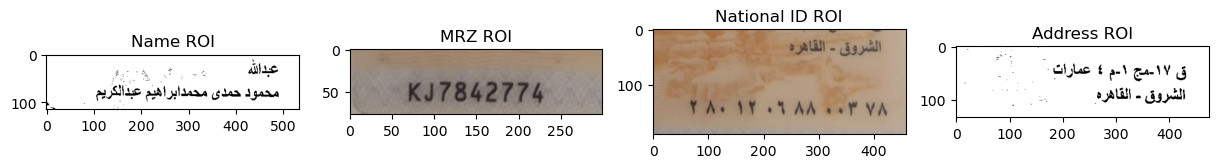

In [44]:
import cv2
import pytesseract
import numpy as np
import matplotlib.pyplot as plt


# ------------------- Preprocessing -------------------

def gray(img):
    if len(img.shape) == 3:  # color image
        return cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    return img  # already grayscale

def Normalize_lighting(img):
    return cv2.equalizeHist(img)

def threshold(img):
    _, th = cv2.threshold(img, 100, 255, cv2.THRESH_TRUNC)
    return th

def increase_contrast(img):
    lab = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
    l, a, b = cv2.split(lab)
    clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8, 8))
    cl = clahe.apply(l)
    limg = cv2.merge((cl, a, b))
    return cv2.cvtColor(limg, cv2.COLOR_LAB2BGR)

def resize_id_card(img):
    #scale_percent = 50  # percent of original size
    width = 712
    height = 512
    dim = (width, height)
    img = cv2.resize(img, dim, interpolation=cv2.INTER_AREA)
    return img


def preprocess_arabic_text(img):
    g = gray(img)
    th = cv2.adaptiveThreshold(
        g, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, 
        cv2.THRESH_BINARY, 31, 15
    )
    return th
# ------------------- OCR Helper -------------------

def ocr_loop(img, lang="eng", min_len=6, max_iter=3):
    """Try multiple preprocessing passes until OCR succeeds"""
    copy = img.copy()
    for attempt in range(max_iter):
        g = gray(img)
        th = threshold(g)
        text = pytesseract.image_to_string(th, lang=lang).strip()
        if len(text) >= min_len:
            return text
        img = increase_contrast(copy)  # retry with stronger contrast
    return "OCR Failed"

### ------------------- Extractors -------------------

## ---------------Front Only---------------
def extract_name(img):
    h, w, _ = img.shape
    roi = img[int(h*0.25):int(h/2.1), int(w/4):w]   # adjust as needed

    roi = preprocess_arabic_text(roi)

    # config_ar = "-l ara --oem 3 --psm 6"
    # text = pytesseract.image_to_string(roi, config=config_ar)
    text = pytesseract.image_to_string(roi, lang="ara").strip()

    return text, roi

def extract_address(img, max_iter=5):
    h, w, _ = img.shape
    roi = img[int(h*0.44):int(h*0.70), int(w/3):w]   # crop address region

    roi = preprocess_arabic_text(roi)
    
    for attempt in range(max_iter):
        g = gray(roi)
        th = threshold(g)

        # First pass: Arabic text only
        text = pytesseract.image_to_string(th, lang="ara").strip()

        # Second pass: Arabic-Indic digits
        digits_text = pytesseract.image_to_string(th, lang="ara_number_id").strip()

        if text or digits_text:
            return text, digits_text, roi

        # retry with stronger contrast if nothing found
        roi = increase_contrast(roi)

    return "OCR Failed", "", roi

def extract_mrz(img):
    h, w, _ = img.shape
    roi = img[int(h*0.85):h, 0:300]  # MRZ area
    return ocr_loop(roi, lang="eng", min_len=6),roi


## ---------------Front and Back---------------
def extract_id_number(img, isFront,max_iter=5):
    h, w, ch = img.shape
    if(isFront):
        roi = img[int(h/1.8):int(h/1.08), int(w/2.8):int(w/1)]
    else:
        roi = img[int(0):int(h/6.5), int(w/2.3):int(w/1)]

    for attempt in range(max_iter):
        g = gray(roi)
        # g=Normalize_lighting()

        th = threshold(g)
        res = pytesseract.image_to_string(th, lang="ara_number_id").split()

        if res:
            for i in res:
                if 13 < len(i) < 15:  # 14 digits
                    return i, roi

            # try reconstructing digits
            f_res = ""
            for i in range(1, len(res) + 1):
                f_res = res[-i] + f_res
                if len(f_res) == 14:
                    return f_res, roi

        # retry with contrast enhancement
        roi = increase_contrast(roi)

    return "OCR Failed", roi


# ------------------- Convert -------------------

def convert_ara_to_eng_digits(text):
    mapping = {
        '٠':'0','١':'1','٢':'2','٣':'3','٤':'4',
        '٥':'5','٦':'6','٧':'7','٨':'8','٩':'9'
    }
    return ''.join(mapping.get(ch, ch) for ch in text)

# ----------analyze id number----------
def analyze_id_number(nid: str):
    if len(nid) != 14 or not nid.isdigit():
        return "Id Number Is Wrong","Id Number Is Wrong","Id Number Is Wrong"

    
    century = 1900 if nid[0] == "2" else 2000

    # Birthdate
    year = century + int(nid[1:3])
    month = int(nid[3:5])
    day = int(nid[5:7])
    birthdate = f"{day:02d}-{month:02d}-{year}"

    # Governorate
    governorate_code = int(nid[7:9])
    governorates = {
        1: "القاهرة", 21: "الجيزة", 2: "الإسكندرية", 12: "الدقهلية",
        31: "البحر الأحمر", 18: "البحيرة", 23: "الفيوم", 16: "الغربية",
        19: "الإسماعيلية", 17: "المنوفية", 24: "المنيا", 14: "القليوبية",
        32: "الوادي الجديد", 4: "السويس", 28: "أسوان", 25: "أسيوط",
        22: "بني سويف", 3: "بورسعيد", 11: "دمياط", 13: "الشرقية",
        35: "جنوب سيناء", 15: "كفر الشيخ", 33: "مطروح", 29: "الأقصر",
        27: "قنا", 34: "شمال سيناء", 26: "سوهاج",  88: "مواليد الخارج"
    }
    birth_governorate = governorates.get(governorate_code, "غير معروف")

    # Gender
    serial_number = int(nid[12])
    gender = "ذكر" if serial_number % 2 != 0 else "أنثى"

    return birthdate, birth_governorate, gender


# ------------------- Main -------------------

def front_id_card(img):

    name_text , name_roi = extract_name(img)
    ara_id_number_text , id_number_roi = extract_id_number(img,isFront=True)
    mrz_text , mrz_roi = extract_mrz(img)
    address_text,digits_text,address_roi = extract_address(img)
    eng_id_number_text=convert_ara_to_eng_digits(ara_id_number_text)
    birth_date_text,birth_governate_text, gender_text = analyze_id_number(eng_id_number_text)


    print("Name:", name_text)
    print("Address Text:", address_text)
    # print("Address Digits:", digits_text)
    print("ID Number in Arabic:",ara_id_number_text)
    print("ID Number in English:",eng_id_number_text)
    print("MRZ:", mrz_text)
    print("Birthdate:", birth_date_text)
    print("Gender:", gender_text)
    print("Birth Governate :", birth_governate_text)

    # Show ROIs for debugging
    fig, axs = plt.subplots(1, 4, figsize=(15,5))
    axs[0].imshow(cv2.cvtColor(name_roi, cv2.COLOR_BGR2RGB)); axs[0].set_title("Name ROI")
    axs[1].imshow(cv2.cvtColor(mrz_roi, cv2.COLOR_BGR2RGB)); axs[1].set_title("MRZ ROI")
    axs[2].imshow(cv2.cvtColor(id_number_roi, cv2.COLOR_BGR2RGB)); axs[2].set_title("National ID ROI")
    axs[3].imshow(cv2.cvtColor(address_roi, cv2.COLOR_BGR2RGB)); axs[3].set_title("Address ROI")
    plt.show()

def main():

    #-----------------Front ID Card-----------------
    front_img = cv2.imread("test/front_4.jpeg")
    front_img=resize_id_card(front_img)
    front_id_card(front_img)


if __name__ == "__main__":
    main()


# Back Only

(807, 1280, 3)
(512, 712, 3)
Name: 
ID Number in Arabic: OCR Failed
ID Number in English: OCR Failed


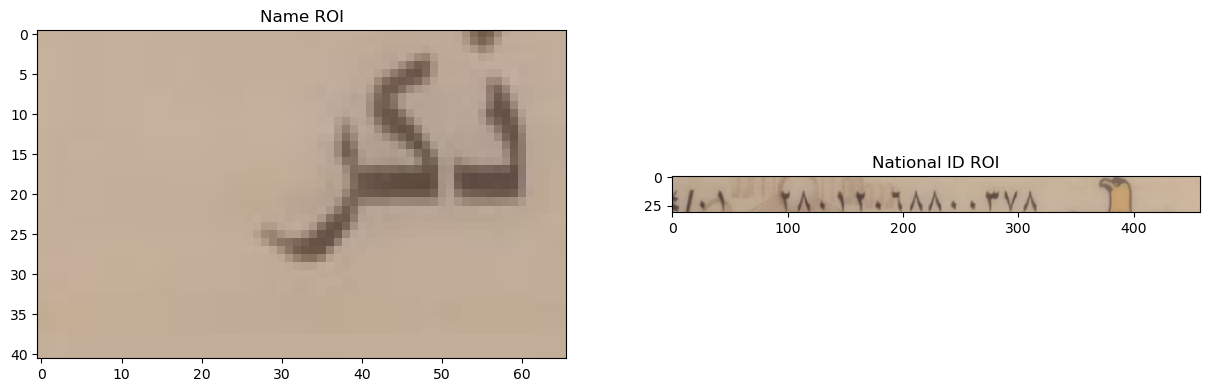

In [ ]:
import cv2
import pytesseract
import numpy as np
import matplotlib.pyplot as plt


# ------------------- Preprocessing -------------------

def gray(img):
    if len(img.shape) == 3:  # color image
        return cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    return img  # already grayscale

def threshold(img):
    _, th = cv2.threshold(img, 100, 255, cv2.THRESH_TRUNC)
    return th

def increase_contrast(img):
    lab = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
    l, a, b = cv2.split(lab)
    clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8, 8))
    cl = clahe.apply(l)
    limg = cv2.merge((cl, a, b))
    return cv2.cvtColor(limg, cv2.COLOR_LAB2BGR)

def resize_id_card(img):
    #scale_percent = 50  # percent of original size
    width = 712
    height = 512
    dim = (width, height)
    img = cv2.resize(img, dim, interpolation=cv2.INTER_AREA)
    return img


def preprocess_arabic_text(img):
    g = gray(img)
    th = cv2.adaptiveThreshold(
        g, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, 
        cv2.THRESH_BINARY, 31, 15
    )
    return th
# ------------------- OCR Helper -------------------

def ocr_loop(img, lang="eng", min_len=6, max_iter=3):
    """Try multiple preprocessing passes until OCR succeeds"""
    copy = img.copy()
    for attempt in range(max_iter):
        g = gray(img)
        th = threshold(g)
        text = pytesseract.image_to_string(th, lang=lang).strip()
        if len(text) >= min_len:
            return text
        img = increase_contrast(copy)  # retry with stronger contrast
    return "OCR Failed"

### ------------------- Extractors -------------------

## ---------------Back Only---------------

def extract_job(img):
    h, w, _ = img.shape
    roi = img[int(h*0.2):int(h/2.2), int(w/3):w]   # adjust as needed

    # proc = preprocess_arabic_text(roi)
    text = pytesseract.image_to_string(roi, lang="ara").strip()

    return text, roi

def extract_gender(img):
    h, w, _ = img.shape
    roi = img[int(h/3.3):int(h/2.6), int(w/1.4):int(w/1.24)]   # adjust as needed

    # proc = preprocess_arabic_text(roi)
    text = pytesseract.image_to_string(roi, lang="ara").strip()

    return text, roi


def extract_status(img):
    h, w, _ = img.shape
    roi = img[int(h*0.2):int(h/2.2), int(w/3):w]   # adjust as needed

    # proc = preprocess_arabic_text(roi)
    text = pytesseract.image_to_string(roi, lang="ara").strip()

    return text, roi

def extract_religion(img):
    h, w, _ = img.shape
    roi = img[int(h*0.2):int(h/2.2), int(w/3):w]   # adjust as needed

    # proc = preprocess_arabic_text(roi)
    text = pytesseract.image_to_string(roi, lang="ara").strip()

    return text, roi

def extract_husband_name(img):
    h, w, _ = img.shape
    roi = img[int(h*0.2):int(h/2.2), int(w/3):w]   # adjust as needed

    # proc = preprocess_arabic_text(roi)
    text = pytesseract.image_to_string(roi, lang="ara").strip()

    return text, roi


## ---------------Front and Back---------------
def extract_id_number(img, isFront,max_iter=5):
    h, w, ch = img.shape
    if(isFront):
        roi = img[int(h/1.8):int(h/1.08), int(w/2.8):int(w/1)]
    else:
        # roi = img[int(0):int(h/6.5), int(w/2.3):int(w/1)]
        roi = img[int(h/20):int(h/9), int(w/2.8):int(w/1)]


    for attempt in range(max_iter):
        g = gray(roi)
        th = threshold(g)
        res = pytesseract.image_to_string(th, lang="ara_number_id").split()

        if res:
            for i in res:
                if 13 < len(i) < 15:  # 14 digits
                    return i, roi

            # try reconstructing digits
            f_res = ""
            for i in range(1, len(res) + 1):
                f_res = res[-i] + f_res
                if len(f_res) == 14:
                    return f_res, roi

        # retry with contrast enhancement
        # roi = increase_contrast(roi)

    return "OCR Failed", roi


# ------------------- Convert -------------------

def convert_ara_to_eng_digits(text):
    mapping = {
        '٠':'0','١':'1','٢':'2','٣':'3','٤':'4',
        '٥':'5','٦':'6','٧':'7','٨':'8','٩':'9'
    }
    return ''.join(mapping.get(ch, ch) for ch in text)

# ----------analyze id number----------
def analyze_id_number(nid: str):
    if len(nid) != 14 or not nid.isdigit():
        return "Id Number Is Wrong"

    
    century = 1900 if nid[0] == "2" else 2000

    # Birthdate
    year = century + int(nid[1:3])
    month = int(nid[3:5])
    day = int(nid[5:7])
    birthdate = f"{day:02d}-{month:02d}-{year}"

    # Governorate
    governorate_code = int(nid[7:9])
    governorates = {
        1: "القاهرة", 21: "الجيزة", 2: "الإسكندرية", 12: "الدقهلية",
        31: "البحر الأحمر", 18: "البحيرة", 23: "الفيوم", 16: "الغربية",
        19: "الإسماعيلية", 17: "المنوفية", 24: "المنيا", 14: "القليوبية",
        32: "الوادي الجديد", 4: "السويس", 28: "أسوان", 25: "أسيوط",
        22: "بني سويف", 3: "بورسعيد", 11: "دمياط", 13: "الشرقية",
        35: "جنوب سيناء", 15: "كفر الشيخ", 33: "مطروح", 29: "الأقصر",
        27: "قنا", 34: "شمال سيناء", 26: "سوهاج"
    }
    birth_governorate = governorates.get(governorate_code, "غير معروف")

    # Gender
    serial_number = int(nid[12])
    gender = "ذكر" if serial_number % 2 != 0 else "أنثى"

    return birthdate, birth_governorate, gender


# ------------------- Main -------------------
def back_id_card(img):

    name_text , name_roi = extract_gender(img)
    ara_id_number_text , id_number_roi = extract_id_number(img,isFront=False)
    # mrz_text , mrz_roi = extract_mrz(img)
    # address_text,digits_text,address_roi = extract_address(img)
    eng_id_number_text = convert_ara_to_eng_digits(ara_id_number_text)
    # birth_date_text,birth_governate_text, gender_text = analyze_id_number(eng_id_number_text)


    print("Name:", name_text)
    # print("Address Text:", address_text)
    # print("Address Digits:", digits_text)
    print("ID Number in Arabic:",ara_id_number_text)
    print("ID Number in English:",eng_id_number_text)
    # print("MRZ:", mrz_text)
    # print("Birthdate:", birth_date_text)
    # print("Gender:", gender_text)
    # print("Birth Governate :", birth_governate_text)

    # Show ROIs for debugging
    fig, axs = plt.subplots(1, 2, figsize=(15,5))
    axs[0].imshow(cv2.cvtColor(name_roi, cv2.COLOR_BGR2RGB)); axs[0].set_title("Name ROI")
    axs[1].imshow(cv2.cvtColor(id_number_roi, cv2.COLOR_BGR2RGB)); axs[1].set_title("National ID ROI")
    # axs[2].imshow(cv2.cvtColor(address_roi, cv2.COLOR_BGR2RGB)); axs[2].set_title("Address ROI")
    # axs[3].imshow(cv2.cvtColor(mrz_roi, cv2.COLOR_BGR2RGB)); axs[3].set_title("MRZ ROI")
    plt.show()



def main():

    #-----------------Back ID Card-----------------
    back_img = cv2.imread("test/back_4.jpeg")
    print(back_img.shape)
    back_img = resize_id_card(back_img)
    print(back_img.shape)
    back_id_card(back_img)

if __name__ == "__main__":
    main()


# Other

Name: محمد
عبدالمنعم محمد السيد
ID Number: ('27010200202071', {'تاريخ الميلاد': '20-10-1970', 'المحافظة': 'الإسكندرية', 'النوع': 'ذكر'})
RAW OCR RESULT: ''


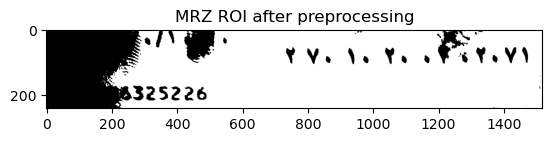

MRZ: None


In [ ]:
import re
from matplotlib import pyplot as plt
import cv2
import pytesseract
import numpy as np

# ------------------- Preprocessing -------------------

def gray(img):
    return cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

def threshold(img):
    _, th = cv2.threshold(img, 100, 255, cv2.THRESH_TRUNC)
    return th

def increase_contrast(img):
    lab = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
    l, a, b = cv2.split(lab)
    clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8, 8))
    cl = clahe.apply(l)
    limg = cv2.merge((cl, a, b))
    return cv2.cvtColor(limg, cv2.COLOR_LAB2BGR)

def resize_id_card(img):
    #scale_percent = 50  # percent of original size
    width = 712
    height = 512
    dim = (width, height)
    img = cv2.resize(img, dim, interpolation=cv2.INTER_AREA)
    return img
# ------------------- OCR Helper -------------------

def ocr_loop(img, lang="eng", min_len=6, max_iter=3):
    """Try multiple preprocessing passes until OCR succeeds"""
    copy = img.copy()
    for attempt in range(max_iter):
        g = gray(img)
        th = threshold(g)
        text = pytesseract.image_to_string(th, lang=lang).strip()
        if len(text) >= min_len:
            return text
        img = increase_contrast(copy)  # retry with stronger contrast
    return "OCR Failed"

# ------------------- Extractors -------------------

def extract_name(img):
    h, w, _ = img.shape
    roi = img[int(h/5):int(h/2.2), int(w/3):w]   # adjust as needed
    return ocr_loop(roi, lang="ara", min_len=3)

def arabic_to_english_digits(text):
    mapping = {
        '٠': '0', '١': '1', '٢': '2', '٣': '3', '٤': '4',
        '٥': '5', '٦': '6', '٧': '7', '٨': '8', '٩': '9'
    }
    return ''.join(mapping.get(ch, ch) for ch in text)
# ---------- تحويل الأرقام العربية للإنجليزية ----------
def arabic_to_english_digits(text):
    mapping = {
        '٠':'0','١':'1','٢':'2','٣':'3','٤':'4',
        '٥':'5','٦':'6','٧':'7','٨':'8','٩':'9'
    }
    return ''.join(mapping.get(ch, ch) for ch in text)

# ---------- استخراج الرقم القومي ----------
def extract_id_number(img):
    img = resize_id_card(img)
    h,w,ch = img.shape
    img = img[int(h/1.8):int(h/1.08), int(w/2.8):int(w/1)]

    while True:
        gray_img = gray(img)
        th_img = threshold(gray_img)
        res = pytesseract.image_to_string(th_img, lang="ara_number_id").split()

        if res:
            for i in res:
                if 13 < len(i) < 15:
                    nid = arabic_to_english_digits(i)
                    return nid, parse_egyptian_national_id(nid)

        f_res = ""
        for i in range(1, len(res)+1):
            if i > 1:
                temp = res[len(res) - i]
                temp += f_res
                f_res = temp
            else:
                f_res += res[len(res) - i]
            if len(f_res) == 14:
                nid = arabic_to_english_digits(f_res)
                return nid, parse_egyptian_national_id(nid)

# ---------- تحليل الرقم القومي ----------
def parse_egyptian_national_id(nid: str):
    if len(nid) != 14 or not nid.isdigit():
        return {"خطأ": "الرقم القومي غير صالح"}

    # القرن
    century = 1900 if nid[0] == "2" else 2000

    # تاريخ الميلاد
    year = century + int(nid[1:3])
    month = int(nid[3:5])
    day = int(nid[5:7])
    birthdate = f"{day:02d}-{month:02d}-{year}"

    # المحافظة
    governorate_code = int(nid[7:9])
    governorates = {
        1: "القاهرة", 21: "الجيزة", 2: "الإسكندرية", 12: "الدقهلية",
        31: "البحر الأحمر", 18: "البحيرة", 23: "الفيوم", 16: "الغربية",
        19: "الإسماعيلية", 17: "المنوفية", 24: "المنيا", 14: "القليوبية",
        32: "الوادي الجديد", 4: "السويس", 28: "أسوان", 25: "أسيوط",
        22: "بني سويف", 3: "بورسعيد", 11: "دمياط", 13: "الشرقية",
        35: "جنوب سيناء", 15: "كفر الشيخ", 33: "مطروح", 29: "الأقصر",
        27: "قنا", 34: "شمال سيناء", 26: "سوهاج"
    }
    governorate = governorates.get(governorate_code, "غير معروف")

    # النوع
    serial_number = int(nid[12])
    gender = "ذكر" if serial_number % 2 != 0 else "أنثى"

    return {
        "تاريخ الميلاد": birthdate,
        "المحافظة": governorate,
        "النوع": gender,
    }
 
def extract_mrz(img, debug=True):
    h, w = img.shape[:2]

    # قص MRZ (خلينا ناخد مساحة أكبر للتجربة)
    y1 = int(h * 0.75)
    y2 = h
    x1 = 0
    x2 = w
    roi = img[y1:y2, x1:x2].copy()

    # Gray + resize + threshold
    gray = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)
    gray = cv2.resize(gray, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC)
    _, th = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    # OCR إعدادات
    config = "--psm 7 -c tessedit_char_whitelist=ABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789"
    raw = pytesseract.image_to_string(th, lang="eng", config=config)

    if debug:
        print("RAW OCR RESULT:", repr(raw))
        plt.imshow(th, cmap='gray')
        plt.title("MRZ ROI after preprocessing")
        plt.show()

    # تنظيف النص
    raw = raw.strip().replace(" ", "").replace("\n", "")
    match = re.search(r"[A-Z]{2}\d{5,}", raw)
    if match:
        return match.group(0)

    return raw if raw else None
# ------------------- Main -------------------

def main():
    img = cv2.imread("id_card.jpeg")
    print("Name:", extract_name(img))
    print("ID Number:", extract_id_number(img))
    print("MRZ:", extract_mrz(img))



if __name__ == "__main__":
    main()
    